In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/ruigekong/OneDrive - University of Cambridge/Git/IMC/Trading_Prep/IMC Round 4/logs/round_4_results.csv', delimiter = ';')
df = df[['timestamp', 'product', 'mid_price', 'profit_and_loss']]
df.head()

,timestamp,product,mid_price,profit_and_loss
0,0,COCONUTS,7947.5,0.0
1,0,DIVING_GEAR,100293.5,0.0
2,0,PINA_COLADAS,14917.5,0.0
3,0,PEARLS,10000.0,0.0
4,0,DIP,7083.5,0.0


In [4]:
main_component_df = df[df['product'] == 'PICNIC_BASKET'].reset_index(drop = True)
components_df = df[(df['product'] == 'DIP') | (df['product'] == 'BAGUETTE') | (df['product'] == 'UKULELE')]
main_component_df.head(), components_df.head()

(   timestamp        product  mid_price  profit_and_loss
 0          0  PICNIC_BASKET    73831.0              0.0
 1        100  PICNIC_BASKET    73824.5              0.0
 2        200  PICNIC_BASKET    73818.0              0.0
 3        300  PICNIC_BASKET    73819.5              0.0
 4        400  PICNIC_BASKET    73828.0              0.0,
     timestamp   product  mid_price  profit_and_loss
 4           0       DIP     7083.5              0.0
 6           0  BAGUETTE    12320.5              0.0
 7           0   UKULELE    20428.5              0.0
 16        100   UKULELE    20424.5              0.0
 19        100       DIP     7083.5              0.0)

In [5]:
# define a dictionary of scaling factors for each product
product_factors = {'DIP': 4, 'BAGUETTE': 2, 'UKULELE': 1}

In [6]:
# define a custom function to apply to each group of data
def scale_mid_price(group:pd.DataFrame):
    # multiply the mid_price column by the scaling factor for each product
    group['mid_price_scaled'] = group['mid_price'] * group['product'].map(product_factors)
    # return the sum of the scaled mid_price values
    return group

In [7]:
new_weighted_df = components_df.groupby('timestamp').apply(scale_mid_price)
new_weighted_df.head()

,timestamp,product,mid_price,profit_and_loss,mid_price_scaled
4,0,DIP,7083.5,0.0,28334.0
6,0,BAGUETTE,12320.5,0.0,24641.0
7,0,UKULELE,20428.5,0.0,20428.5
16,100,UKULELE,20424.5,0.0,20424.5
19,100,DIP,7083.5,0.0,28334.0


In [8]:
components_mid_price_df = new_weighted_df.groupby('timestamp')['mid_price_scaled'].sum().reset_index()
components_mid_price_df.head()

,timestamp,mid_price_scaled
0,0,73403.5
1,100,73396.5
2,200,73395.5
3,300,73385.5
4,400,73399.0


In [9]:
components_profit_df = components_df.groupby('timestamp')['profit_and_loss'].sum().reset_index()
components_profit_df.head()

,timestamp,profit_and_loss
0,0,0.0
1,100,0.0
2,200,0.0
3,300,0.0
4,400,0.0


In [10]:
midprice_difference_df = main_component_df['mid_price'] - components_mid_price_df['mid_price_scaled']
main_component_df['timestamp'], midprice_difference_df

(0            0
 1          100
 2          200
 3          300
 4          400
          ...  
 9995    999500
 9996    999600
 9997    999700
 9998    999800
 9999    999900
 Name: timestamp, Length: 10000, dtype: int64,
 0       427.5
 1       428.0
 2       422.5
 3       434.0
 4       429.0
         ...  
 9995    275.0
 9996    274.0
 9997    268.0
 9998    263.0
 9999    269.5
 Length: 10000, dtype: float64)

In [11]:
overall_profit = main_component_df['profit_and_loss'] + components_profit_df['profit_and_loss']

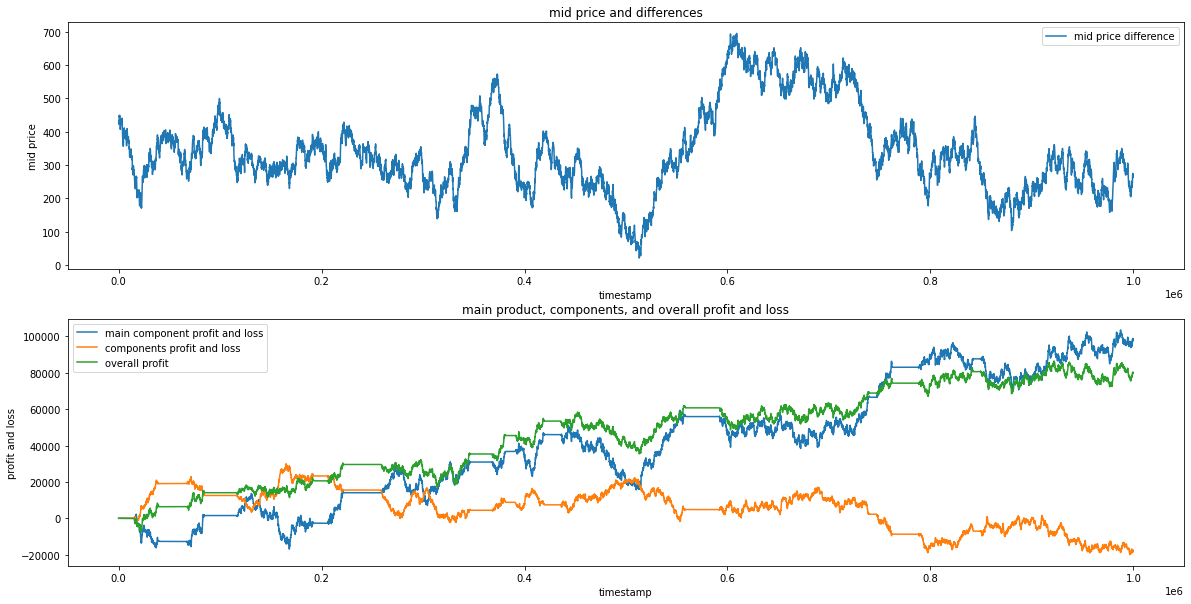

In [13]:
fig, axes = plt.subplots(nrows = 2, figsize = (20,10))

# axes[0].plot(main_component_df['timestamp'], main_component_df['mid_price'], label = 'main component mid price')
# axes[0].plot(components_mid_price_df['timestamp'], components_mid_price_df['mid_price_scaled'], label = 'weighted sum of components mid price')
axes[0].plot(main_component_df['timestamp'], midprice_difference_df, label = 'mid price difference')
axes[0].set_xlabel('timestamp')
axes[0].set_ylabel('mid price')
axes[0].legend()
axes[0].set_title('mid price and differences')

axes[1].plot(main_component_df['timestamp'], main_component_df['profit_and_loss'], label = 'main component profit and loss')
axes[1].plot(components_profit_df['timestamp'], components_profit_df['profit_and_loss'], label = 'components profit and loss')
axes[1].plot(components_profit_df['timestamp'], overall_profit, label = 'overall profit')
axes[1].set_xlabel('timestamp')
axes[1].set_ylabel('profit and loss')
axes[1].legend()
axes[1].set_title('main product, components, and overall profit and loss')

plt.show()
